In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# !pip install geopandas
import geopandas as gpd

# !pip install plotly
# !pip install --upgrade nbformat
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [4]:
# meta = pd.read_csv('/home/mert/Desktop/thesis/thesis/data/wind/meta/meta_large.csv')
ege_farms = pd.read_csv("../data/meta/ege_farms.csv")
ege_farms = ege_farms[~ege_farms["rt_plant_id"].isin([2397, 2420, 2538, 1470, 1526, 1854, 1946])]
ege_farms = ege_farms[~ege_farms["rt_plant_id"].isin([1712, 2098, 2225])] # uşak bursa gemlik
df = ege_farms.groupby(["lat", "lon", "province", "subProvince"])["rt_plant_id"].count().sort_values().reset_index()

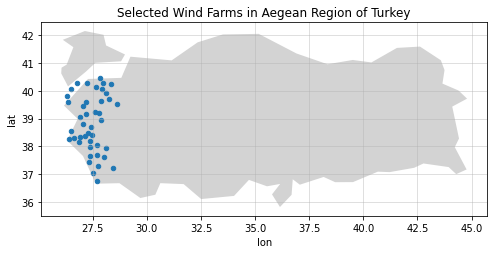

In [5]:
fig, ax = plt.subplots(figsize=(8,6))# plot map on axis

countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Turkey"].plot(color="lightgrey", ax=ax)

df.plot(x="lon", y="lat", kind="scatter", colormap="YlOrRd", # c="rt_plant_id",  
        title="Selected Wind Farms in Aegean Region of Turkey", ax=ax)
ax.grid(b=True, alpha=0.5)
plt.show()

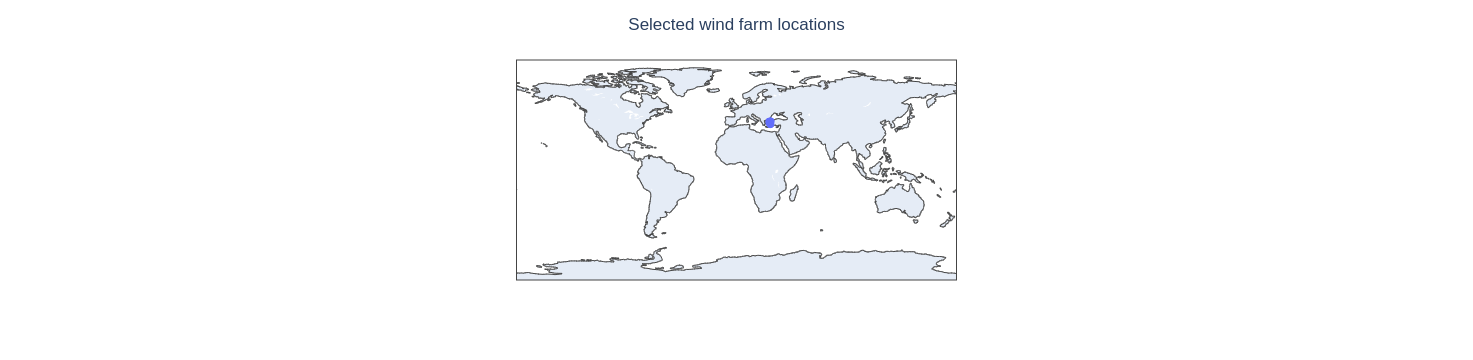

In [6]:
fig = px.scatter_geo(df, lat='lat', lon='lon') #, text="subProvince")
fig.update_layout(title = 'Selected wind farm locations', title_x=0.5)
fig.show()